In [2]:
!pip install -q -U watermark

In [76]:
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [4]:
%reload_ext watermark
%watermark -a "DSA" --iversions

Author: DSA

matplotlib: 3.8.4
numpy     : 1.26.4
scipy     : 1.13.0
pandas    : 2.2.2
sklearn   : 1.4.2
seaborn   : 0.13.2



In [26]:
class Dense:
    def __init__(self, feat_size, out_size):
        self.feat_size = feat_size
        self.out_size = out_size
        self.weights = (np.random.normal(0, 1, feat_size * out_size) * np.sqrt(2/feat_size)).reshape(feat_size, out_size)
        self.bias = np.random.rand(1, out_size) - 0.5

    def forward(self, input_data):
        self.input = input_data
        self.output = np.dot(self.input, self.weights) + self.bias
        return(self.output)

    def backward(self, output_der, lr):
        input_der = np.dot(output_der, self.weights.T)
        weight_der = np.dot(self.input.T.reshape(-1, 1), output_der)
        self.weights -= lr * weight_der
        self.bias -= lr * output_der
        return(input_der)

In [27]:
def relu(x):
    return(np.maximum(0, x))

In [28]:
def relu_prime(x):
    x[x > 0] = 1
    x[x <= 0] = 0
    return x

In [29]:
class ActLayer:
    def __init__(self, act, act_prime):
        self.act = act
        self.act_prime = act_prime

    def forward(self, input_data):
        self.input = input_data
        self.output = self.act(self.input)
        return (self.output)

    def backward(self, output_der, lr):
        return(self.act_prime(self.input) * output_der)

In [30]:
def mse(y_true, y_pred):
    return(np.mean((y_pred - y_true)**2))

In [31]:
def mse_prime(y_true, y_pred):
    return(2*(y_pred - y_true) / y_true.size)

In [37]:
class Network:
    def __init__ (self, loss, loss_prime):
        self.layers = []
        self.loss = loss
        self.loss_prime = loss_prime
    
    def add(self, layer):
        self.layers.append(layer)

    def predict(self, input_data):
        result = []

        for a in range(len(input_data)):
            layer_output = input_data[a]
    
            for layer in self.layers:
                layer_output = layer.forward(layer_output)
            result.append(layer_output)
        return(result)

    def fit(self, X_train, y_train, epochs, lr):
        for a in range(epochs):
            err = 0

            for j in range(len(X_train)):
                layer_output = X_train[j]
                
                for layer in self.layers:
                    layer_output = layer.forward(layer_output)
                    
                err += self.loss(y_train[j], layer_output)

                gradient = self.loss_prime(y_train[j], layer_output)

                for layer in reversed(self.layers):
                    
                    gradient = layer.backward(gradient, lr)

            err /= len(X_train)
            print('Epoch %d/%d Err = %f' % (a + 1, epochs, err))
    

In [41]:
x_train = np.array([[[0,0]],[[0,1]],[[1,0]],[[1,1]]])
y_train = np.array([[[0]],[[1]],[[1]],[[0]]])
x_train = x_train.reshape(-1,2)
y_train = y_train.reshape(-1,1)

model_xor = Network(mse, mse_prime)
model_xor.add(Dense(2, 3))
model_xor.add(ActLayer(relu, relu_prime))
model_xor.add(Dense(3, 1))

model_xor.fit(x_train, y_train, epochs = 2000, lr = 0.01)

y_pred = model_xor.predict(x_train)

Epoch 1/2000 Err = 1.735997
Epoch 2/2000 Err = 1.280031
Epoch 3/2000 Err = 0.995195
Epoch 4/2000 Err = 0.808058
Epoch 5/2000 Err = 0.680331
Epoch 6/2000 Err = 0.590330
Epoch 7/2000 Err = 0.525060
Epoch 8/2000 Err = 0.476419
Epoch 9/2000 Err = 0.439206
Epoch 10/2000 Err = 0.410008
Epoch 11/2000 Err = 0.386546
Epoch 12/2000 Err = 0.367271
Epoch 13/2000 Err = 0.351115
Epoch 14/2000 Err = 0.337332
Epoch 15/2000 Err = 0.325391
Epoch 16/2000 Err = 0.314910
Epoch 17/2000 Err = 0.305607
Epoch 18/2000 Err = 0.297275
Epoch 19/2000 Err = 0.289752
Epoch 20/2000 Err = 0.282916
Epoch 21/2000 Err = 0.276671
Epoch 22/2000 Err = 0.270938
Epoch 23/2000 Err = 0.265655
Epoch 24/2000 Err = 0.260768
Epoch 25/2000 Err = 0.256234
Epoch 26/2000 Err = 0.252017
Epoch 27/2000 Err = 0.248083
Epoch 28/2000 Err = 0.244405
Epoch 29/2000 Err = 0.240960
Epoch 30/2000 Err = 0.237725
Epoch 31/2000 Err = 0.234682
Epoch 32/2000 Err = 0.231815
Epoch 33/2000 Err = 0.229107
Epoch 34/2000 Err = 0.226547
Epoch 35/2000 Err = 0.2

In [42]:
print("Valor Real:", "\n",
      list(y_train.reshape(-1,)), "\n",
      "-------------", "\n",
      "Valor Previsto:", "\n",
      [round(float(a)) for a in y_pred])
      

Valor Real: 
 [0, 1, 1, 0] 
 ------------- 
 Valor Previsto: 
 [0, 1, 1, 0]


/tmp/ipykernel_36282/3452384429.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  [round(float(a)) for a in y_pred])


In [43]:
# Volatility (standard deviation), sigma de SDE e PDE
vol = 0.17

# Maturity
T = 1/2

# Number of epochs
n = 1000

# Initial stock price
s_0 = 100

r = 0.05

k = 100

In [48]:
def calculate_spot(prev, sigma, r, step, random):
    return(prev + (sigma*prev*random) + (r*prev*step))

In [49]:
def sim_spot(s0, r, steps, maturity, vol):
    delta_t = T/steps
    time = np.round(np.arange(0,maturity+delta_t, delta_t), 4)
    prices = [s0]
    normal_dist = np.random.normal(0, np.sqrt(delta_t), 10000)
    for a in range(steps):
        prices.append(calculate_spot(prices[-1], vol, r, delta_t, normal_dist[a]))
    return (prices)

In [50]:
sims = pd.DataFrame()
for a in range(5):
    sims[a] = sim_spot(s_0, r, n, T, vol)


In [51]:
sims.columns = ["Sim_1", "Sim_2", "Sim_3", "Sim_4", "Sim_5"]
sims.index = np.round(np.arange(0, 0.5 + (0.5 / 1000), 0.5 / 1000), 4)

[Text(0.5, 0, 'Steps'),
 Text(0, 0.5, 'Preço dos Ativos'),
 Text(0.5, 1.0, 'Simulations')]

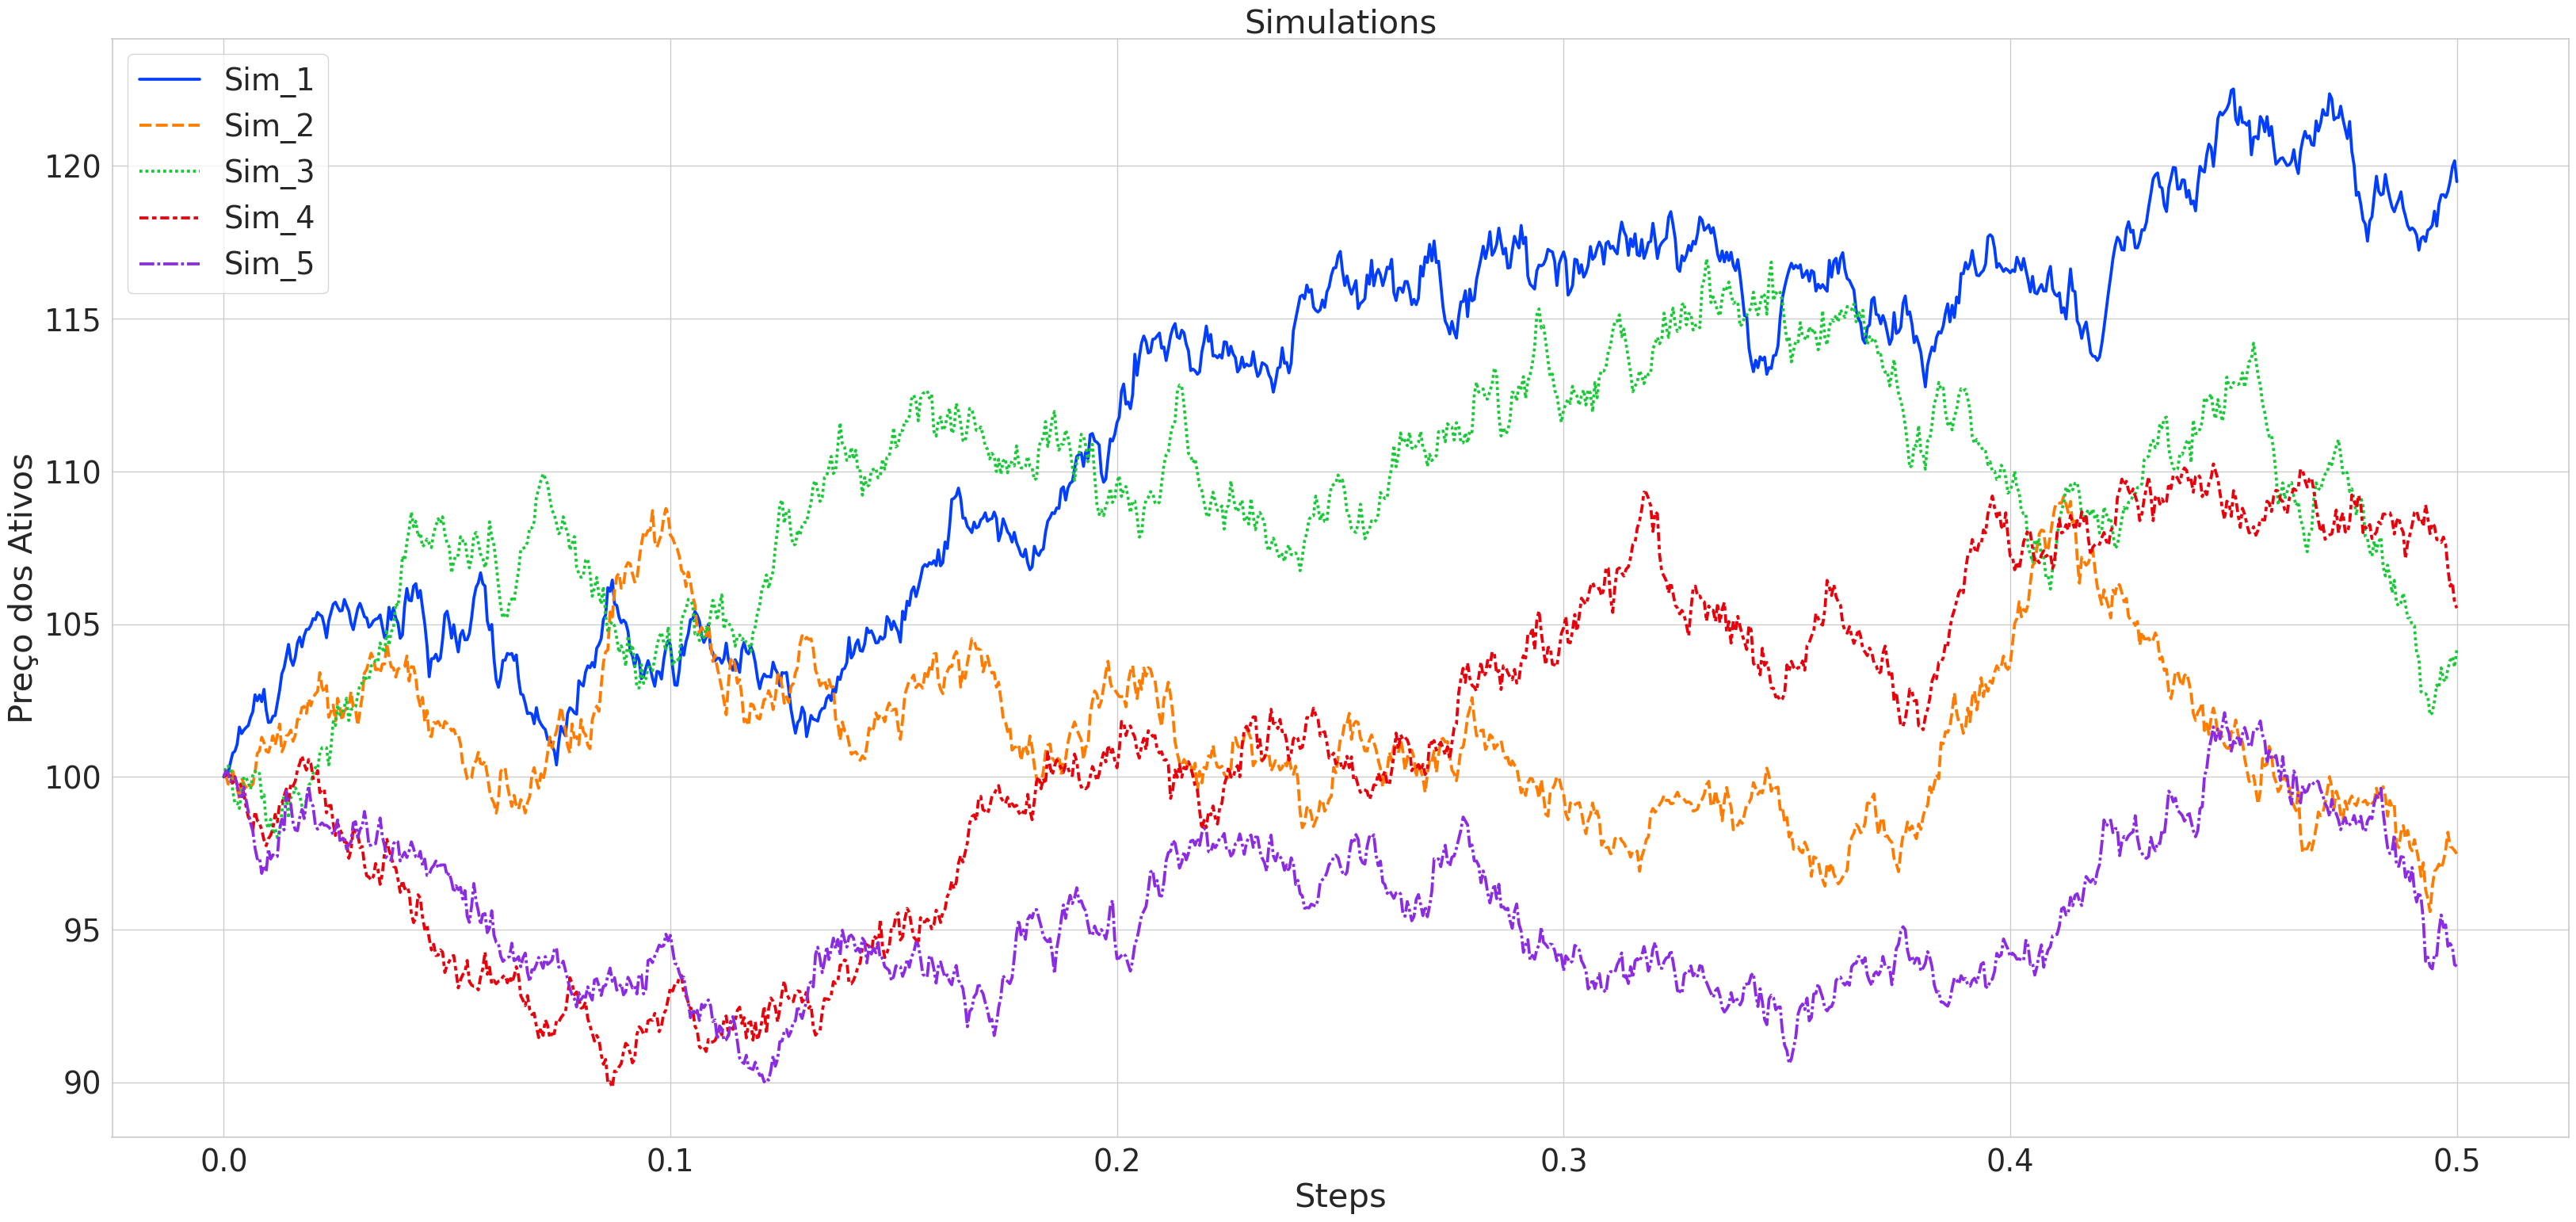

In [53]:
sns.set(style = 'whitegrid', font_scale = 2.5)
plt.figure(figsize = (40, 18))
ax = sns.lineplot(data = sims, palette = 'bright', linewidth = 2.7)
ax.set(xlabel = 'Steps', ylabel = 'Preço dos Ativos', title = 'Simulations')

In [54]:
def d1(s, k, r, t, T, vol):
    if T != t:
        nomin = np.log(s/k) + (r + 0.5*(vol**2))*(T-t)
        denom = vol*np.sqrt((T-t))
        return(nomin/denom)
    else:
        None

def d2(s, k, r, t, T, vol):
    if T != t:
        nomin = np.log(s/k) + (r - 0.5*(vol**2))*(T-t)
        denom = vol*np.sqrt((T-t))
        return(nomin/denom)
    else:
        None

def call(d1, d2, k, r, T, t, s):
    return(s*scipy.stats.norm.cdf(d1) - k*np.exp(-r*(T-t))*scipy.stats.norm.cdf(d2))


In [55]:
call_prices = []
maturity = []
for (a, b) in zip(sims["Sim_1"], sims.index):
    if b != T:
        d1_ = d1(a, k, r, b, T, vol)
        d2_ = d2(a, k, r, b, T, vol)
        call_prices.append(call(d1_, d2_, k, r, T, b, a))
        maturity.append((T-b))
    else:
        call_prices.append(max(a-k, 0))
        maturity.append(0)


In [79]:
opt_price = pd.DataFrame(call_prices, sims.index)
opt_price = opt_price.rename(columns = {0: "Sim_1_Call"})
opt_price = pd.concat([opt_price, sims["Sim_1"]], axis = 1)
min_max = MinMaxScaler(feature_range=(min(call_prices), max(call_prices)))
opt_price["Sim_1_scaled"] = min_max.fit_transform(opt_price["Sim_1"].values.reshape(-1,1))
opt_price.index = pd.date_range(start = '01/01/2024', end = '06/01/2024', periods = 1001)

[Text(0.5, 0, 'Data'),
 Text(0, 0.5, 'Preço dos Ativos'),
 Text(0.5, 1.0, 'Preço da Ação - valor de Venda da Ação')]

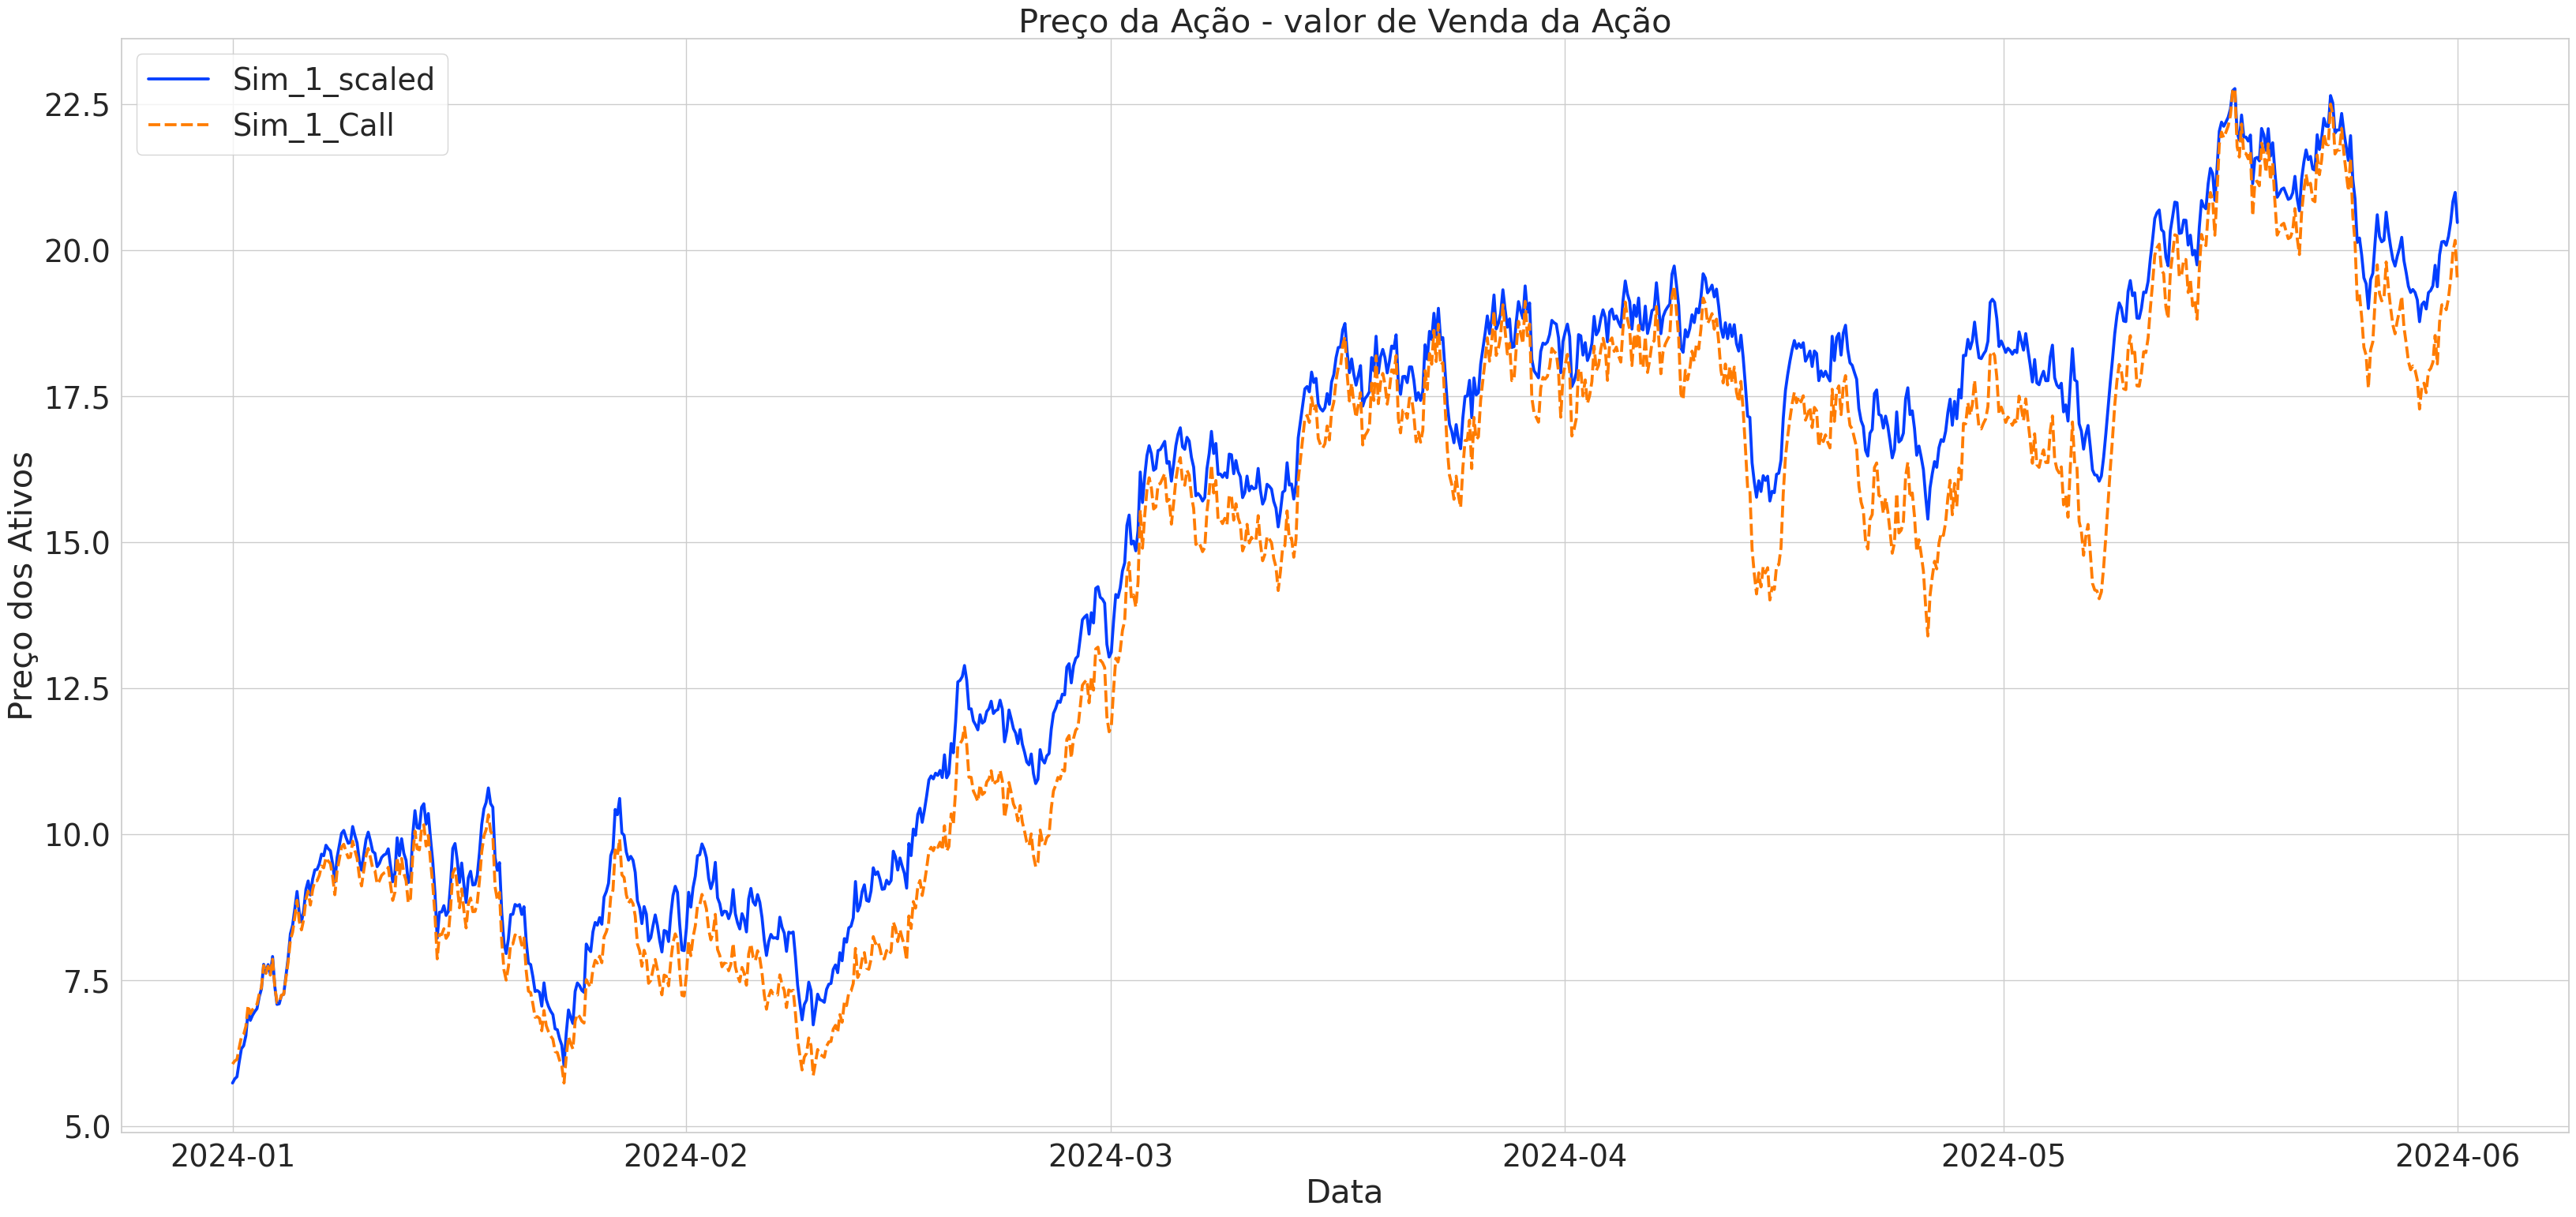

In [80]:
sns.set(style = 'whitegrid', font_scale=2.5)
plt.figure(figsize=(40, 18))
ax = sns.lineplot(data = opt_price[["Sim_1_scaled", "Sim_1_Call"]], palette = "bright", linewidth = 2.7)
ax.set(xlabel = 'Data', ylabel = 'Preço dos Ativos', title = 'Preço da Ação - valor de Venda da Ação')

In [81]:
opt_price["Maturity"] = maturity
opt_price["Strike"] = k
opt_price["Risk_Free"] = r
opt_price["Volatility"] = vol
model_data = opt_price.drop(["Sim_1_scaled"], axis = 1)

In [82]:
model_data.head()

,Sim_1_Call,Sim_1,Maturity,Strike,Risk_Free,Volatility
2024-01-01 00:00:00.000,6.069936,100.000000,0.5000,100,0.05,0.17
2024-01-01 03:38:52.800,6.123479,100.094243,0.4995,100,0.05,0.17
2024-01-01 07:17:45.600,6.148777,100.141803,0.4990,100,0.05,0.17
2024-01-01 10:56:38.400,6.350544,100.475672,0.4985,100,0.05,0.17
2024-01-01 14:35:31.200,6.535933,100.778038,0.4980,100,0.05,0.17


In [83]:
train_data = model_data.iloc[:round(len(model_data) * 0.8)]
test_data = model_data.iloc[len(train_data):]

In [84]:
X_train = train_data.drop(["Sim_1_Call"], axis = 1).values
y_train = train_data["Sim_1_Call"].values

X_test = test_data.drop(["Sim_1_Call"], axis = 1).values
y_test = test_data["Sim_1_Call"].values

min_max = MinMaxScaler()


min_max.fit(X_train)
X_train = min_max.transform(X_train)
X_test = min_max.transform(X_test)

print("X_train shape:", X_train.shape, "\n",
      "y_train shape:", y_train.shape, "\n",
      "X_test shape:", X_test.shape, "\n",
      "X_test shape:", y_test.shape)

X_train shape: (801, 5) 
 y_train shape: (801,) 
 X_test shape: (200, 5) 
 X_test shape: (200,)


In [95]:
%%time

model = Network(mse, mse_prime)
model.add(Dense(5, 200))
model.add(ActLayer(relu, relu_prime))
model.add(Dense(200, 200))
model.add(ActLayer(relu, relu_prime))
model.add(Dense(200, 200))
model.add(ActLayer(relu, relu_prime))
model.add(Dense(200, 200))
model.add(ActLayer(relu, relu_prime))
model.add(Dense(200, 1))

model.fit(X_train, y_train, epochs = 10, lr = 0.001)

# Prev

y_pred_10 = model.predict(X_test)
y_pred_10 = [float(a) for a in y_pred_10]

Epoch 1/10 Err = 0.922438
Epoch 2/10 Err = 0.426171
Epoch 3/10 Err = 0.232564
Epoch 4/10 Err = 0.104867
Epoch 5/10 Err = 0.058511
Epoch 6/10 Err = 0.036330
Epoch 7/10 Err = 0.027666
Epoch 8/10 Err = 0.024127
Epoch 9/10 Err = 0.022632
Epoch 10/10 Err = 0.021014
CPU times: user 5.93 s, sys: 7.95 ms, total: 5.94 s
Wall time: 5.95 s


<timed exec>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)


In [96]:
%%time

model = Network(mse, mse_prime)
model.add(Dense(5, 200))
model.add(ActLayer(relu, relu_prime))
model.add(Dense(200, 200))
model.add(ActLayer(relu, relu_prime))
model.add(Dense(200, 200))
model.add(ActLayer(relu, relu_prime))
model.add(Dense(200, 200))
model.add(ActLayer(relu, relu_prime))
model.add(Dense(200, 1))

model.fit(X_train, y_train, epochs = 100, lr = 0.001)

y_pred_100 = model.predict(X_test)
y_pred_100 = [float(a) for a in y_pred_100]

Epoch 1/100 Err = 0.374770
Epoch 2/100 Err = 0.410274
Epoch 3/100 Err = 0.203451
Epoch 4/100 Err = 0.096822
Epoch 5/100 Err = 0.049944
Epoch 6/100 Err = 0.027159
Epoch 7/100 Err = 0.018383
Epoch 8/100 Err = 0.015621
Epoch 9/100 Err = 0.014722
Epoch 10/100 Err = 0.013790
Epoch 11/100 Err = 0.012777
Epoch 12/100 Err = 0.011882
Epoch 13/100 Err = 0.011165
Epoch 14/100 Err = 0.010670
Epoch 15/100 Err = 0.010249
Epoch 16/100 Err = 0.009866
Epoch 17/100 Err = 0.009514
Epoch 18/100 Err = 0.009209
Epoch 19/100 Err = 0.008929
Epoch 20/100 Err = 0.008659
Epoch 21/100 Err = 0.008266
Epoch 22/100 Err = 0.008023
Epoch 23/100 Err = 0.007684
Epoch 24/100 Err = 0.007363
Epoch 25/100 Err = 0.007110
Epoch 26/100 Err = 0.006797
Epoch 27/100 Err = 0.006578
Epoch 28/100 Err = 0.006323
Epoch 29/100 Err = 0.006030
Epoch 30/100 Err = 0.005827
Epoch 31/100 Err = 0.005607
Epoch 32/100 Err = 0.005387
Epoch 33/100 Err = 0.005166
Epoch 34/100 Err = 0.004962
Epoch 35/100 Err = 0.004756
Epoch 36/100 Err = 0.004594
E

<timed exec>:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)


In [108]:
%%time

model = Network(mse, mse_prime)
model.add(Dense(5, 200))
model.add(ActLayer(relu, relu_prime))
model.add(Dense(200, 200))
model.add(ActLayer(relu, relu_prime))
model.add(Dense(200, 200))
model.add(ActLayer(relu, relu_prime))
model.add(Dense(200, 200))
model.add(ActLayer(relu, relu_prime))
model.add(Dense(200, 1))

model.fit(X_train, y_train, epochs = 200, lr = 0.001)

y_pred_200 = model.predict(X_test)
y_pred_200 = [float(a) for a in y_pred_200]

Epoch 1/200 Err = 0.769098
Epoch 2/200 Err = 0.340114
Epoch 3/200 Err = 0.142969
Epoch 4/200 Err = 0.066054
Epoch 5/200 Err = 0.033485
Epoch 6/200 Err = 0.019749
Epoch 7/200 Err = 0.014839
Epoch 8/200 Err = 0.013264
Epoch 9/200 Err = 0.012417
Epoch 10/200 Err = 0.011770
Epoch 11/200 Err = 0.011173
Epoch 12/200 Err = 0.010566
Epoch 13/200 Err = 0.010151
Epoch 14/200 Err = 0.009734
Epoch 15/200 Err = 0.009351
Epoch 16/200 Err = 0.009039


KeyboardInterrupt: 

In [92]:
%%time

model = Network(mse, mse_prime)
model.add(Dense(5, 200))
model.add(ActLayer(relu, relu_prime))
model.add(Dense(200, 200))
model.add(ActLayer(relu, relu_prime))
model.add(Dense(200, 200))
model.add(ActLayer(relu, relu_prime))
model.add(Dense(200, 200))
model.add(ActLayer(relu, relu_prime))
model.add(Dense(200, 1))

model.fit(X_train, y_train, epochs = 1000, lr = 0.001)

# Prev

y_pred_1k = model.predict(X_test)
y_pred_1k = [float(a) for a in y_pred_1k]

Epoch 1/1000 Err = 0.434606
Epoch 2/1000 Err = 1.065503
Epoch 3/1000 Err = 0.902588
Epoch 4/1000 Err = 0.176492
Epoch 5/1000 Err = 0.057370
Epoch 6/1000 Err = 0.022484
Epoch 7/1000 Err = 0.015902
Epoch 8/1000 Err = 0.015001
Epoch 9/1000 Err = 0.014098
Epoch 10/1000 Err = 0.013411
Epoch 11/1000 Err = 0.013124
Epoch 12/1000 Err = 0.012921
Epoch 13/1000 Err = 0.012549
Epoch 14/1000 Err = 0.012002
Epoch 15/1000 Err = 0.011439
Epoch 16/1000 Err = 0.010859
Epoch 17/1000 Err = 0.010271
Epoch 18/1000 Err = 0.009739
Epoch 19/1000 Err = 0.009121
Epoch 20/1000 Err = 0.008572
Epoch 21/1000 Err = 0.008076
Epoch 22/1000 Err = 0.007652
Epoch 23/1000 Err = 0.007156
Epoch 24/1000 Err = 0.006735
Epoch 25/1000 Err = 0.006331
Epoch 26/1000 Err = 0.005930
Epoch 27/1000 Err = 0.005571
Epoch 28/1000 Err = 0.005279
Epoch 29/1000 Err = 0.004966
Epoch 30/1000 Err = 0.004736
Epoch 31/1000 Err = 0.004493
Epoch 32/1000 Err = 0.004230
Epoch 33/1000 Err = 0.004036
Epoch 34/1000 Err = 0.003847
Epoch 35/1000 Err = 0.0

/tmp/ipykernel_36282/3520483748.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_1000 = [float(a) for a in y_pred_1000]


In [97]:
%%time

model = Network(mse, mse_prime)
model.add(Dense(5, 200))
model.add(ActLayer(relu, relu_prime))
model.add(Dense(200, 200))
model.add(ActLayer(relu, relu_prime))
model.add(Dense(200, 200))
model.add(ActLayer(relu, relu_prime))
model.add(Dense(200, 200))
model.add(ActLayer(relu, relu_prime))
model.add(Dense(200, 1))

model.fit(X_train, y_train, epochs = 5000, lr = 0.001)

# Prev

y_pred_5k = model.predict(X_test)
y_pred_5k = [float(a) for a in y_pred_5k]

Epoch 1/5000 Err = 0.556872
Epoch 2/5000 Err = 0.361142
Epoch 3/5000 Err = 0.144982
Epoch 4/5000 Err = 0.070134
Epoch 5/5000 Err = 0.037803
Epoch 6/5000 Err = 0.026363
Epoch 7/5000 Err = 0.019559
Epoch 8/5000 Err = 0.018300
Epoch 9/5000 Err = 0.017308
Epoch 10/5000 Err = 0.016200
Epoch 11/5000 Err = 0.015199
Epoch 12/5000 Err = 0.014486
Epoch 13/5000 Err = 0.013867
Epoch 14/5000 Err = 0.013314
Epoch 15/5000 Err = 0.012926
Epoch 16/5000 Err = 0.012530
Epoch 17/5000 Err = 0.012102
Epoch 18/5000 Err = 0.011696
Epoch 19/5000 Err = 0.011306
Epoch 20/5000 Err = 0.010968
Epoch 21/5000 Err = 0.010637
Epoch 22/5000 Err = 0.010320
Epoch 23/5000 Err = 0.009999
Epoch 24/5000 Err = 0.009610
Epoch 25/5000 Err = 0.009288
Epoch 26/5000 Err = 0.008942
Epoch 27/5000 Err = 0.008663
Epoch 28/5000 Err = 0.008352
Epoch 29/5000 Err = 0.008104
Epoch 30/5000 Err = 0.007845
Epoch 31/5000 Err = 0.007606
Epoch 32/5000 Err = 0.007356
Epoch 33/5000 Err = 0.007115
Epoch 34/5000 Err = 0.006931
Epoch 35/5000 Err = 0.0

<timed exec>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)


In [100]:
y_pred_10 = np.array(y_pred_10).reshape(-1,)
y_pred_100 = np.array(y_pred_100).reshape(-1,)
y_pred_1k = np.array(y_pred_1000).reshape(-1,)
y_pred_5k = np.array(y_pred_5k).reshape(-1,)

In [102]:
all_preds = pd.DataFrame({"Valor_Real": y_test,
                          "10 Epochs": y_pred_10,
                          "100 Epochs": y_pred_100,
                          "1000 Epochs": y_pred_1k,
                          "5000 Epochs": y_pred_5k}, index = test_data.index)

[Text(0.5, 0, 'Data'),
 Text(0, 0.5, 'Preço do Ativo'),
 Text(0.5, 1.0, 'Após 10 Epochs,  MSE:1.139')]

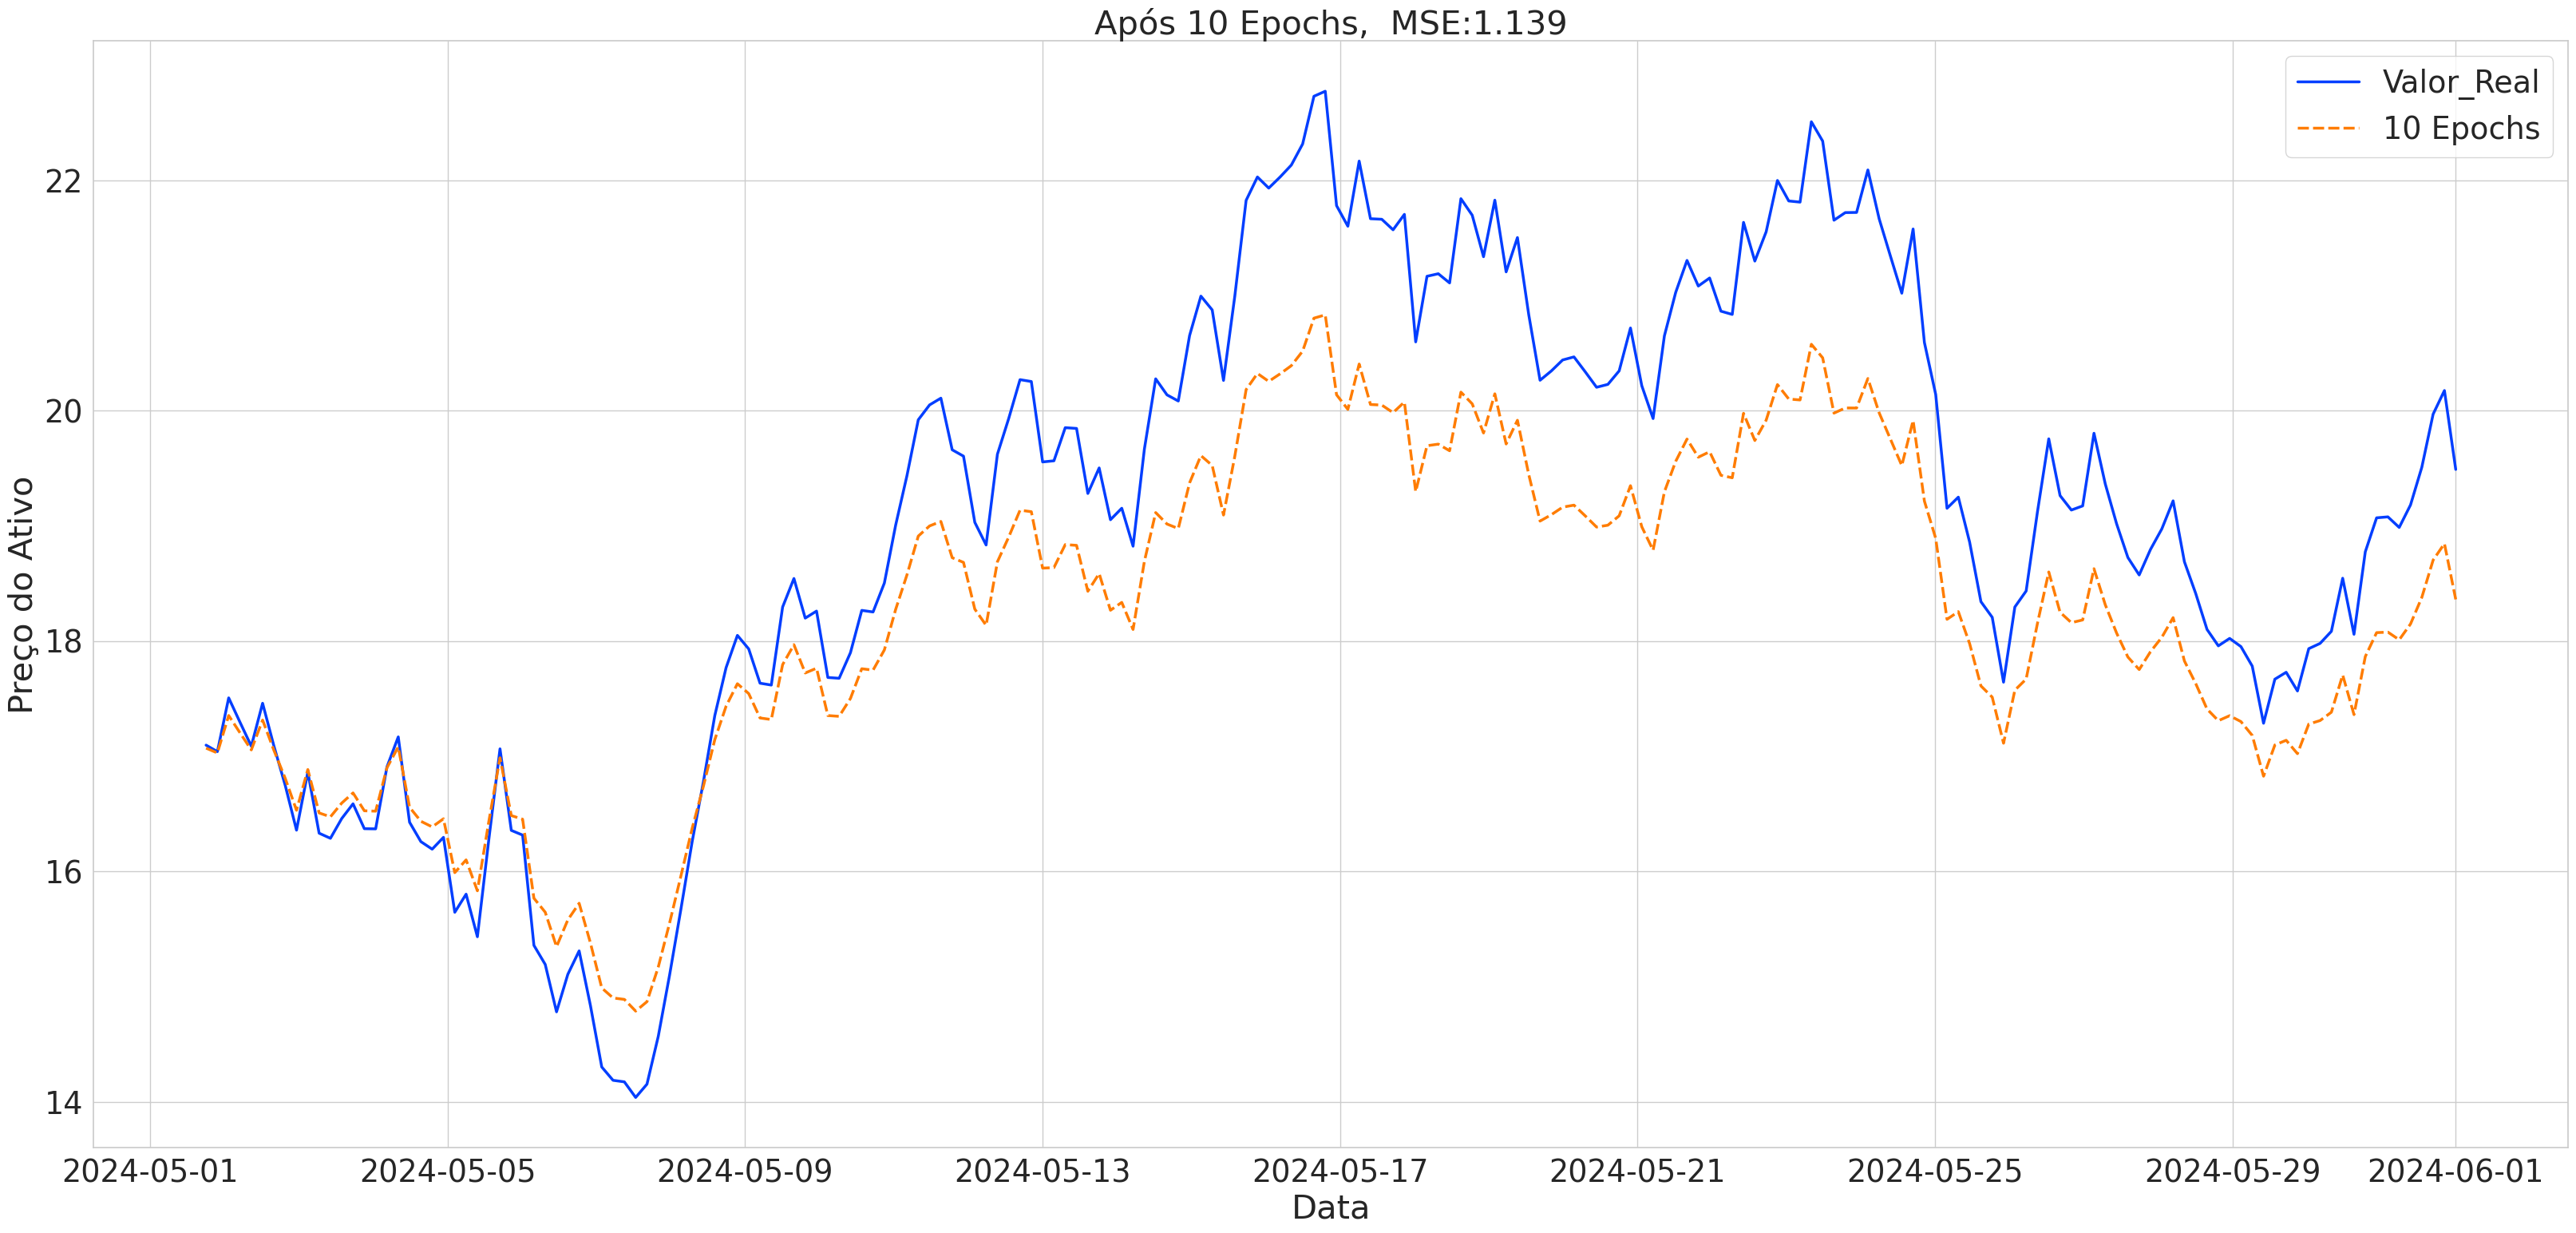

In [103]:
plt.figure(figsize = (40, 18))
ax = sns.lineplot(data = all_preds[["Valor_Real", "10 Epochs"]], palette = "bright", linewidth = 2.5)
ax.set(xlabel = 'Data', 
       ylabel = 'Preço do Ativo', 
       title = f'Após 10 Epochs,  MSE:{round(mean_squared_error(all_preds.Valor_Real, all_preds["10 Epochs"]), 3)}')

[Text(0.5, 0, 'Data'),
 Text(0, 0.5, 'Preço do Ativo'),
 Text(0.5, 1.0, 'Após 100 Epochs,  MSE:0.296')]

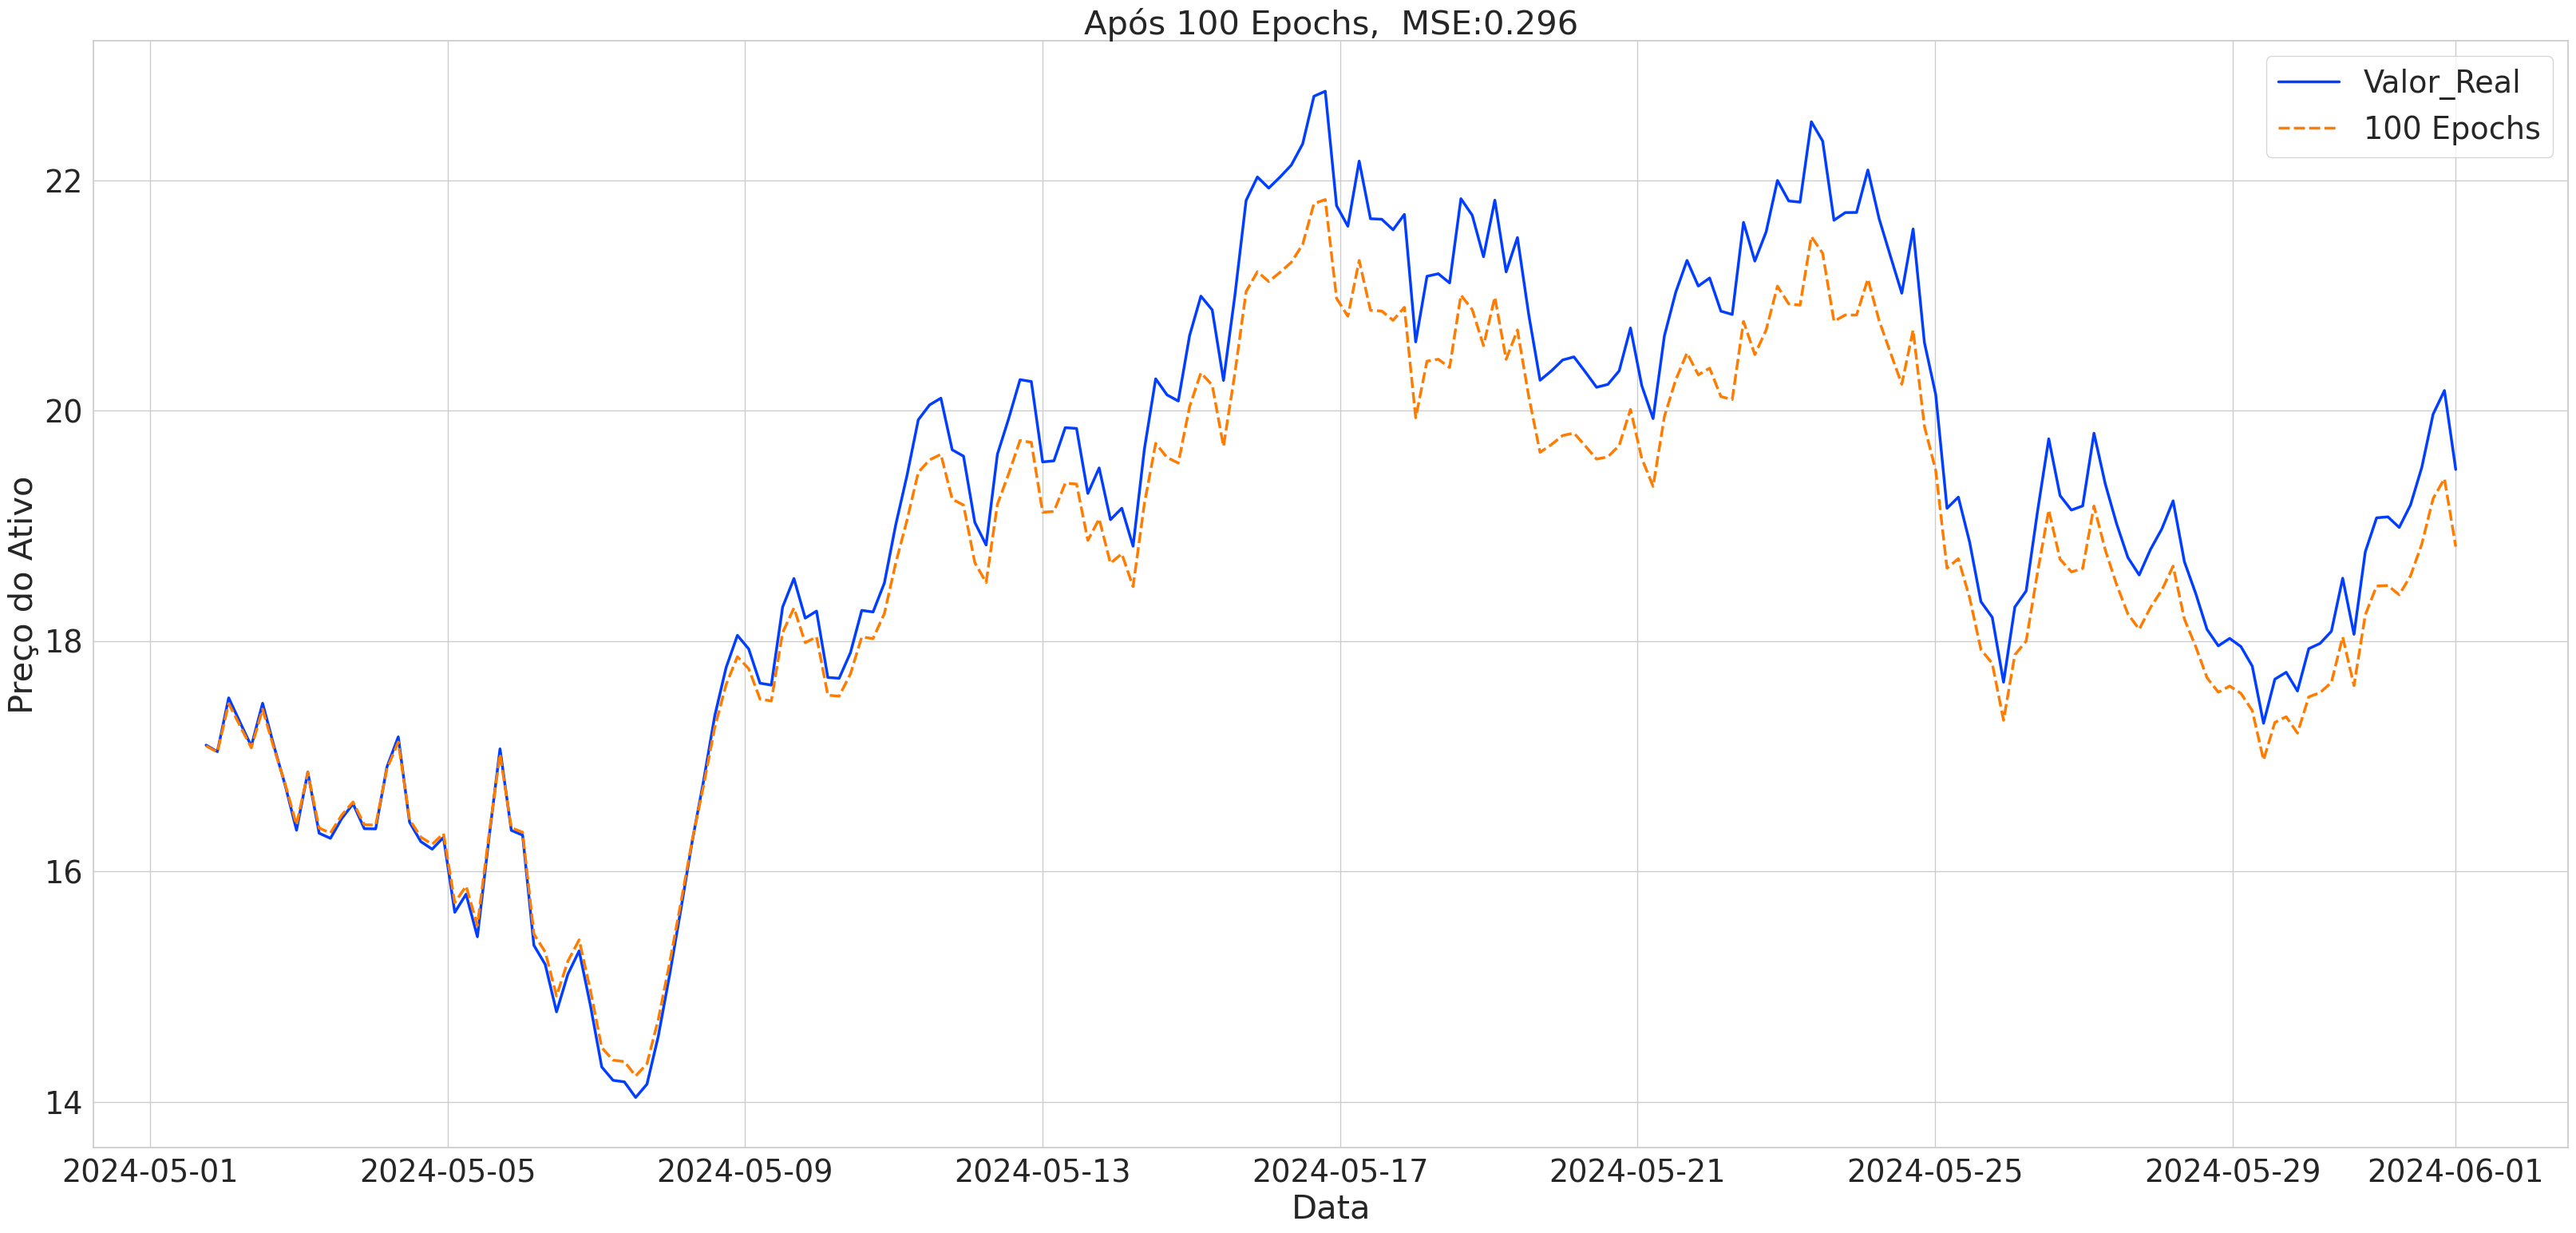

In [104]:
plt.figure(figsize = (40, 18))
ax = sns.lineplot(data = all_preds[["Valor_Real", "100 Epochs"]], palette = "bright", linewidth = 2.5)
ax.set(xlabel = 'Data', 
       ylabel = 'Preço do Ativo', 
       title = f'Após 100 Epochs,  MSE:{round(mean_squared_error(all_preds.Valor_Real, all_preds["100 Epochs"]), 3)}')

[Text(0.5, 0, 'Data'),
 Text(0, 0.5, 'Preço do Ativo'),
 Text(0.5, 1.0, 'Após 1000 Epochs,  MSE:0.289')]

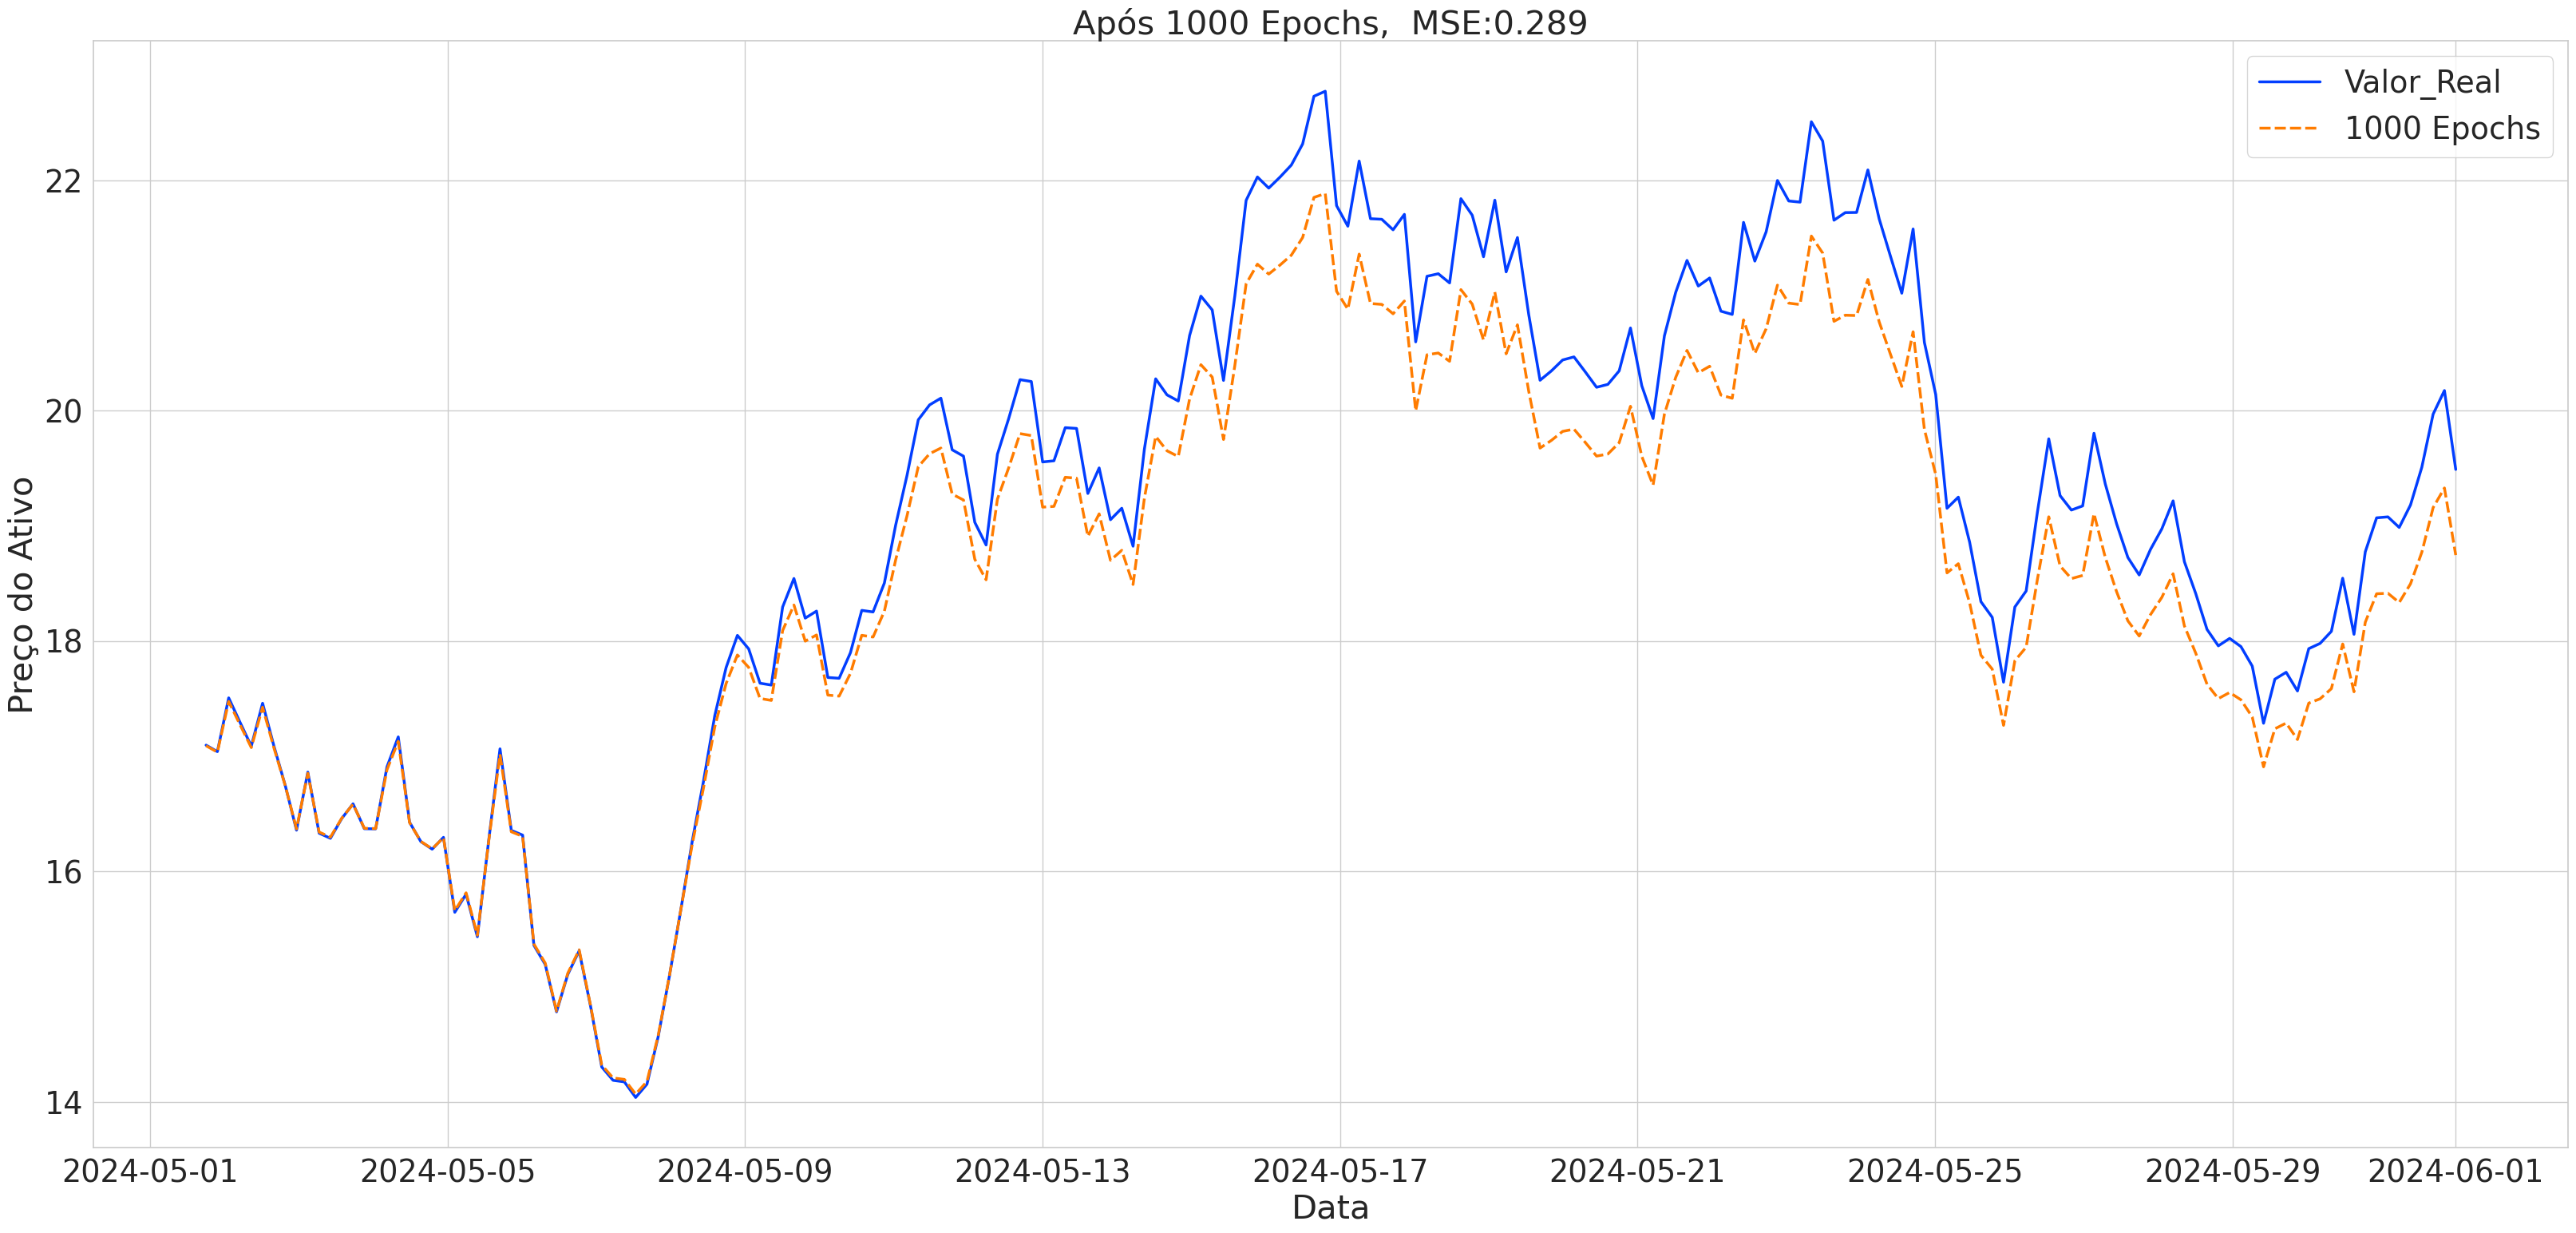

In [106]:
plt.figure(figsize = (40, 18))
ax = sns.lineplot(data = all_preds[["Valor_Real", "1000 Epochs"]], palette = "bright", linewidth = 2.5)
ax.set(xlabel = 'Data', 
       ylabel = 'Preço do Ativo', 
       title = f'Após 1000 Epochs,  MSE:{round(mean_squared_error(all_preds.Valor_Real, all_preds["1000 Epochs"]), 3)}')

[Text(0.5, 0, 'Data'),
 Text(0, 0.5, 'Preço do Ativo'),
 Text(0.5, 1.0, 'Após 5000 Epochs,  MSE:0.225')]

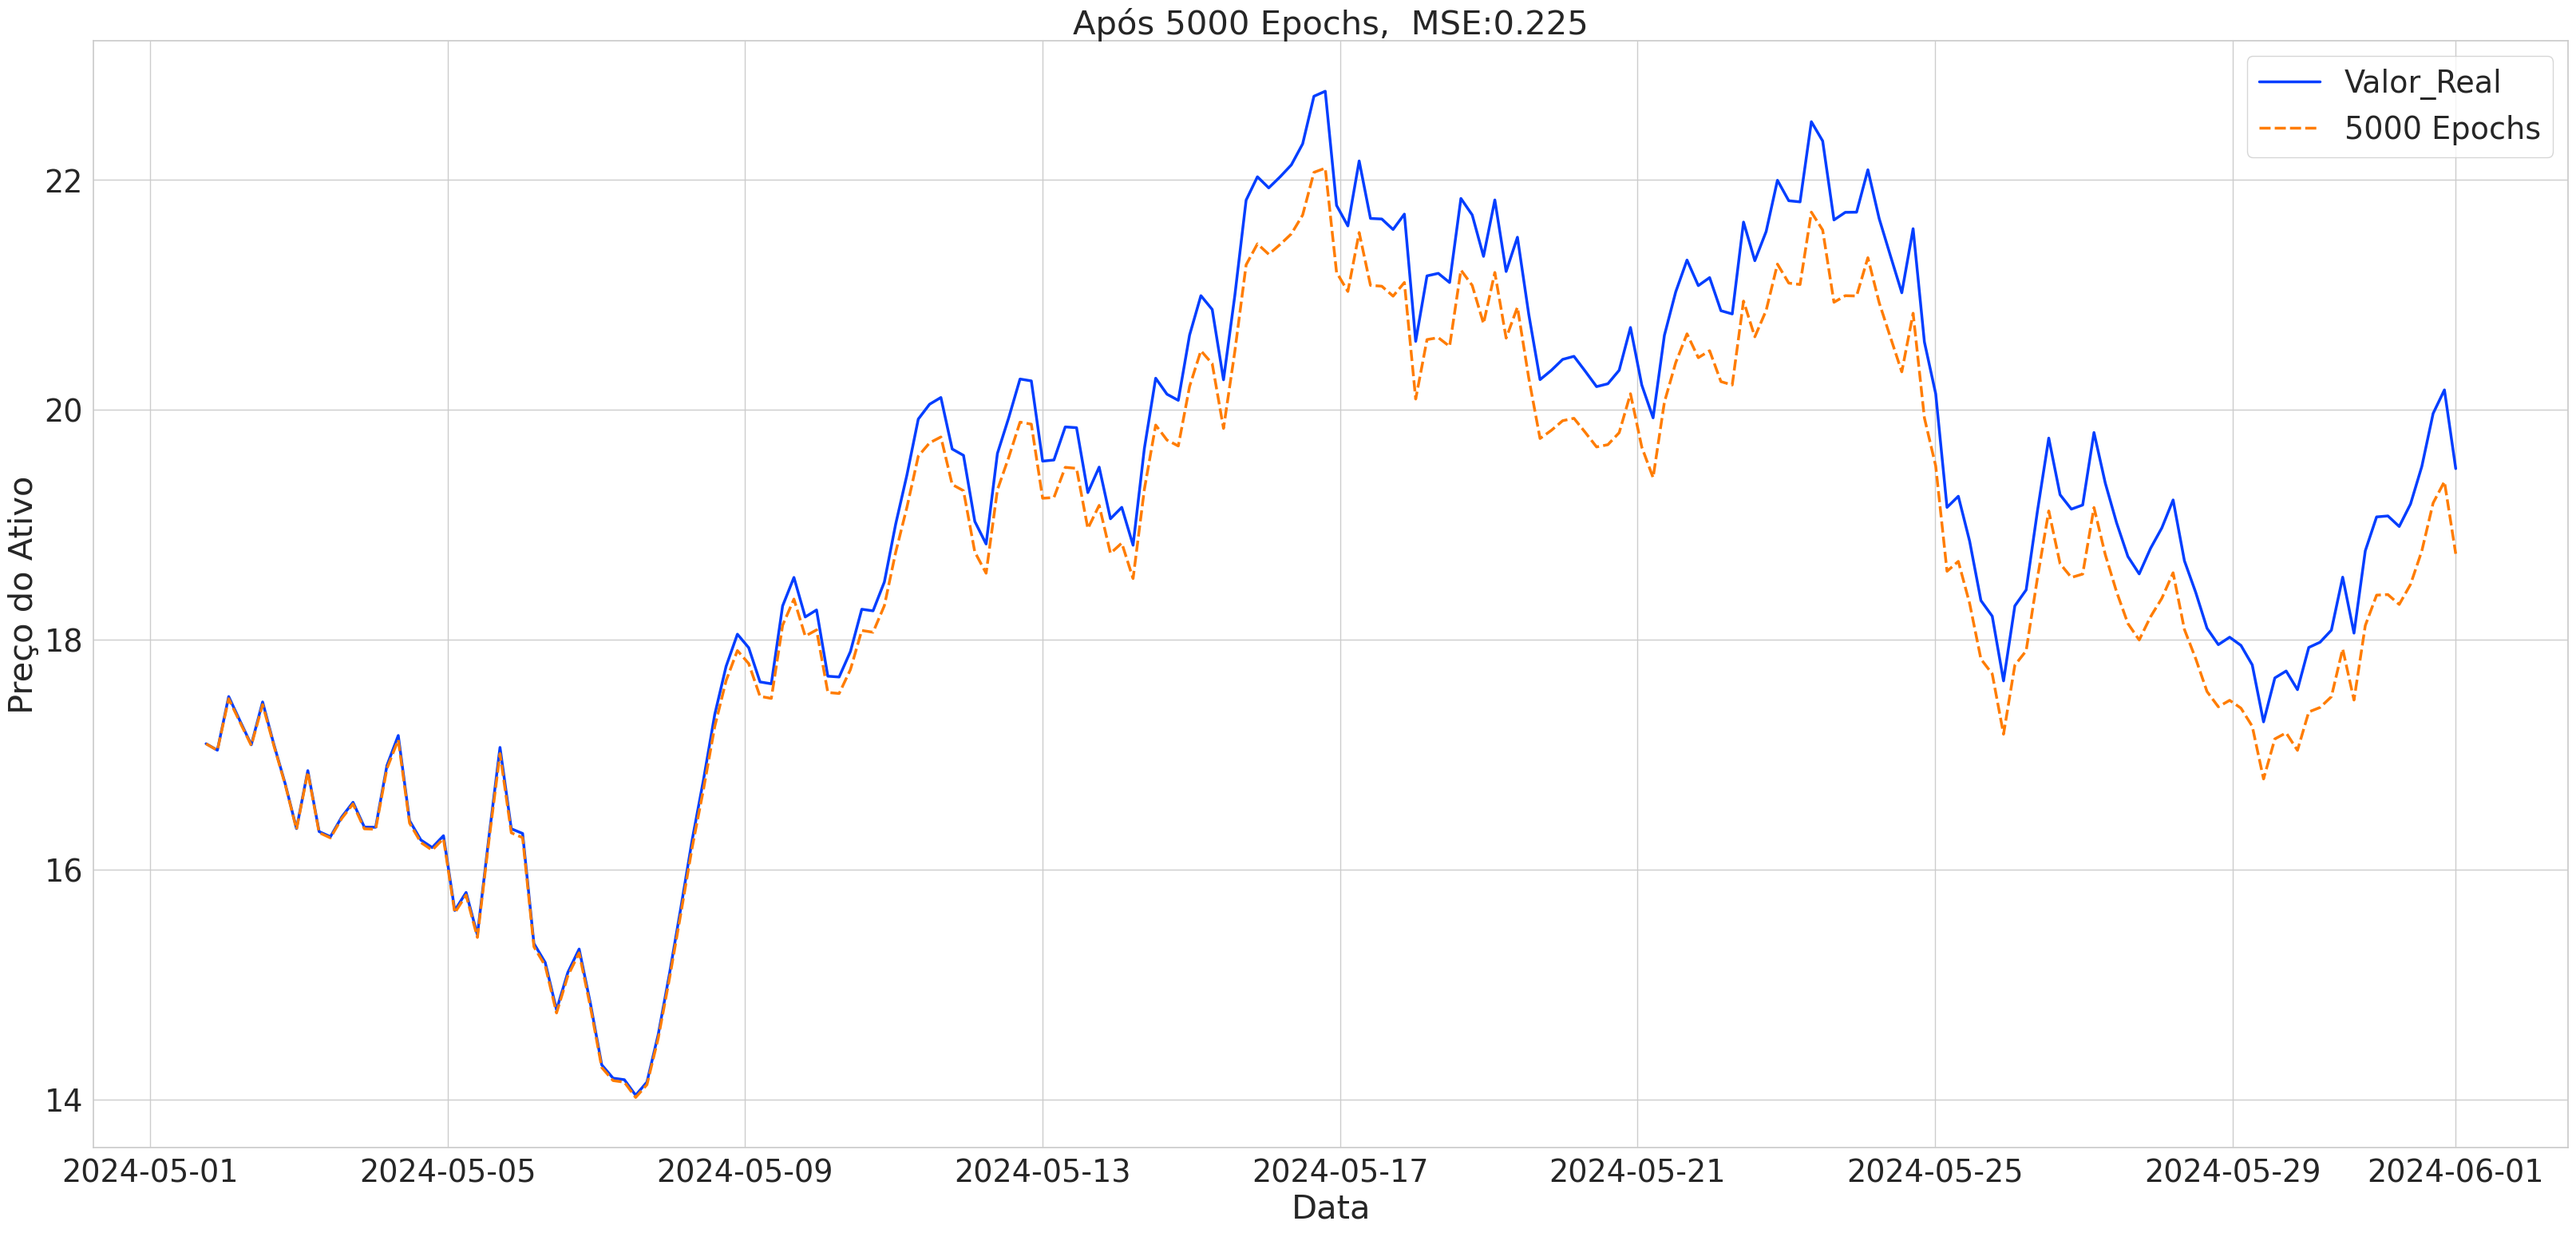

In [107]:
plt.figure(figsize = (40, 18))
ax = sns.lineplot(data = all_preds[["Valor_Real", "5000 Epochs"]], palette = "bright", linewidth = 2.5)
ax.set(xlabel = 'Data', 
       ylabel = 'Preço do Ativo', 
       title = f'Após 5000 Epochs,  MSE:{round(mean_squared_error(all_preds.Valor_Real, all_preds["5000 Epochs"]), 3)}')